/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_2547/3484837114.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  V = pt.load(f"{wk_dir}/V_matrices_{dataset}/V

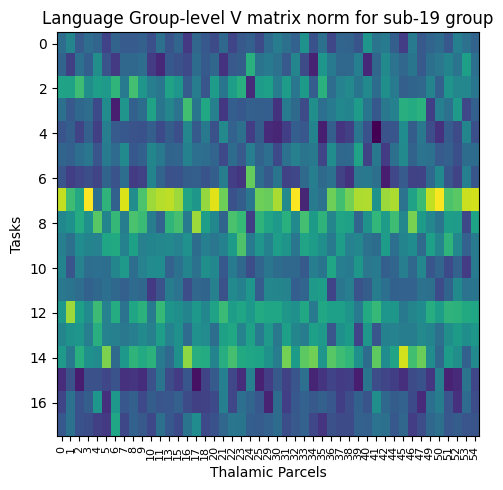

In [340]:
#V vector visualization

import torch as pt
import numpy as np
import matplotlib.pyplot as plt

wk_dir = '/Users/incehusain/fs_projects'

dataset = 'Language'
subj = 'sub-19'

sessions = ['group']

#sessions = ['ses-archi', 'ses-clips4',  'ses-enumeration','ses-hcp1', 'ses-hcp2','ses-lyon1', 
 #           'ses-lyon2','ses-mathlang', 'ses-mtt1', 'ses-mtt2',  'ses-preference', 'ses-rsvplanguage', 
  #          'ses-spatialnavigation', 'ses-tom']

V_matrices = []

for ses in sessions:
    V = pt.load(f"{wk_dir}/V_matrices_{dataset}/V_{ses}_{subj}_norm.pt")
    V_matrices.append(V)

V_matrices = np.stack(V_matrices, axis=0)

mask = np.any(V_matrices > 0, axis=(0, 1))
filtered_V = V_matrices[:, :, mask]

parcel_indices = np.arange(V_matrices.shape[2])
filtered_parcel_indices = parcel_indices[mask]

n_sessions = len(sessions)
fig, axs = plt.subplots(1, n_sessions, figsize=(5*n_sessions, 5)) 

if n_sessions == 1:
    axs = [axs]

for i, ses in enumerate(sessions):
    im = axs[i].imshow(filtered_V[i], aspect='auto', cmap='viridis')  
    axs[i].set_title(f'{dataset} Group-level V matrix norm for {subj} {ses}')
    axs[i].set_xlabel('Thalamic Parcels')
    axs[i].set_ylabel('Tasks')

    axs[i].set_xticks(np.arange(len(filtered_parcel_indices)))
    axs[i].set_xticklabels(filtered_parcel_indices, rotation=90, fontsize=8)    

plt.tight_layout()
plt.show()


/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_2547/1569103132.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  V = pt.load(f"{wk_dir}/V_Iglesias_Social.pt")


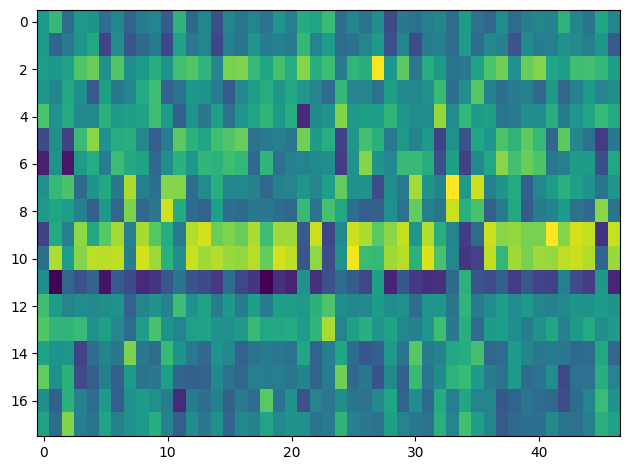

In [345]:
#V vector visualization

import torch as pt
import numpy as np
import matplotlib.pyplot as plt

wk_dir = '/Users/incehusain/fs_projects'

V = pt.load(f"{wk_dir}/V_Iglesias_Social.pt")
    

im = plt.imshow(V, aspect='auto', cmap='viridis')    

plt.tight_layout()
plt.show()


/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_2547/3622775719.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  parcel = pt.load(f"{wk_dir}/cosine_similariti

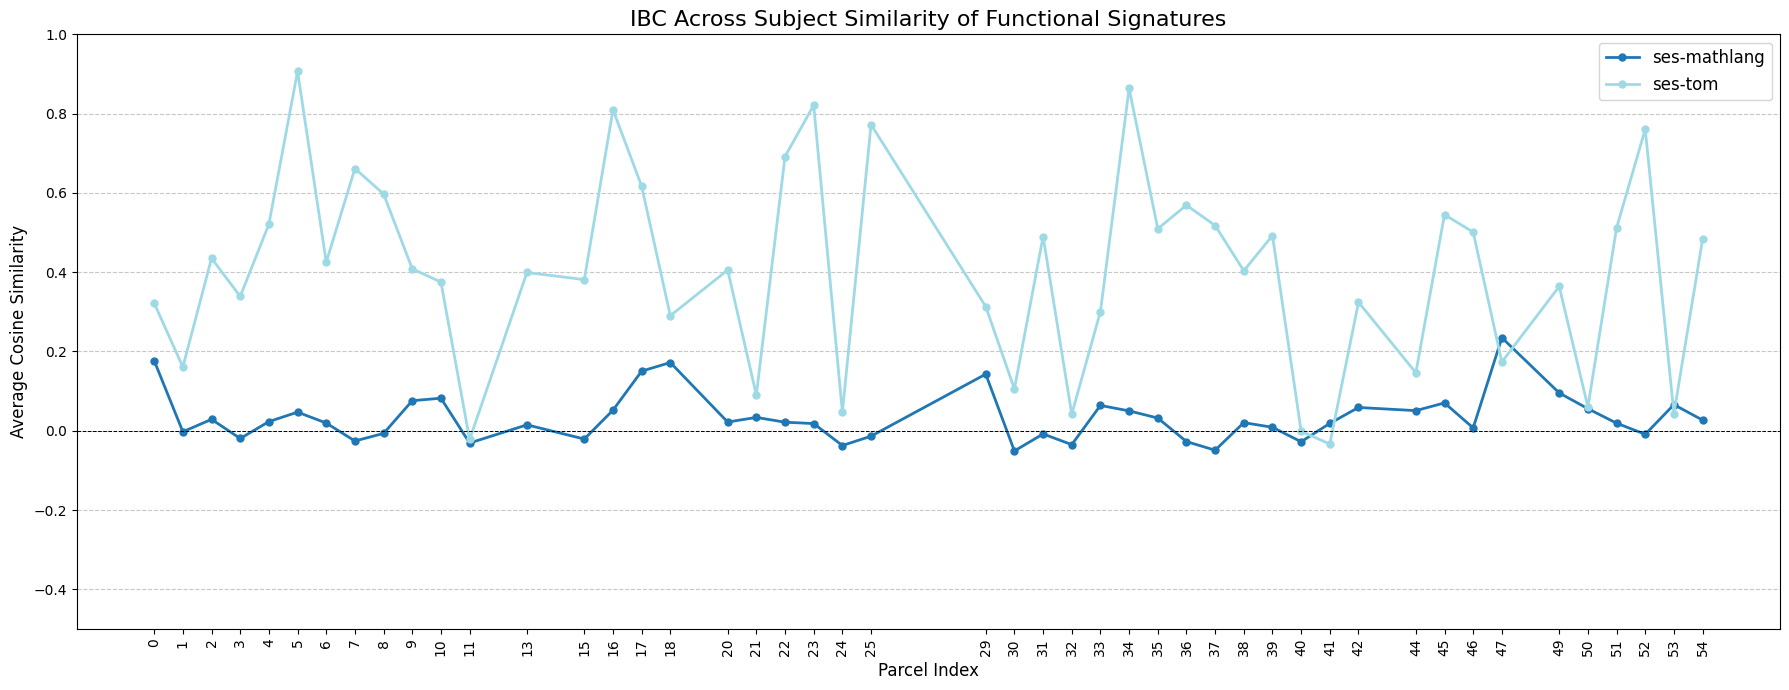

In [98]:
import torch as pt
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


wk_dir = '/Users/incehusain/fs_projects'

dataset = 'IBC'

sessions = ['ses-mathlang', 'ses-tom']

#sessions = ['ses-archi', 'ses-clips4',  'ses-enumeration','ses-hcp1', 'ses-hcp2','ses-lyon1', 
 #           'ses-lyon2','ses-mathlang', 'ses-mtt1', 'ses-mtt2',  'ses-preference', 'ses-rsvplanguage', 
  #          'ses-spatialnavigation', 'ses-tom']

means = []
stds = []

for ses in sessions:
    parcel = pt.load(f"{wk_dir}/cosine_similarities_{dataset}/{ses}_cosine_btwn_subj_parcels_group.pt")
    mean = np.array([arr.mean() for arr in parcel])  
    std = np.array([arr.std() for arr in parcel])
    means.append(mean)
    stds.append(std)

means = np.array(means)
stds = np.array(stds)

num_parcels = means.shape[1]
parcel_indices = np.arange(num_parcels)

mask = means[0] != 0   

filtered_indices = parcel_indices[mask]

fig, ax = plt.subplots(figsize=(18, 7))

colors = plt.cm.tab20(np.linspace(0, 1, len(sessions)))
for i, ses in enumerate(sessions):
    filtered_mean = means[i][mask]  
    filtered_std = stds[i][mask]  
    ax.plot(filtered_indices, filtered_mean, 'o-', label=f'{ses}', color=colors[i], linewidth=2, markersize=5)
    #ax.fill_between(filtered_indices, filtered_mean - filtered_std, filtered_mean + filtered_std, color=colors[i], alpha=0.2)

ax.set_title(f'{dataset} Across Subject Similarity of Functional Signatures', fontsize=16)
ax.set_xlabel('Parcel Index', fontsize=12)
ax.set_ylabel('Average Cosine Similarity', fontsize=12)

ax.set_xticks(filtered_indices)

if num_parcels > 30:
    ax.tick_params(axis='x', labelrotation=90)

ax.set_ylim(-0.5, 1)
ax.axhline(0, color='black', linestyle='--', linewidth=0.7)

ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#t_stat, p_value = stats.ttest_rel(mean_Social, mean_mdtb_ses2)   
#print(f"T-statistic: {t_stat}, P-value: {p_value}")

/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_2547/3293937164.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  parcel = pt.load(f"{wk_dir}/cosine_similariti

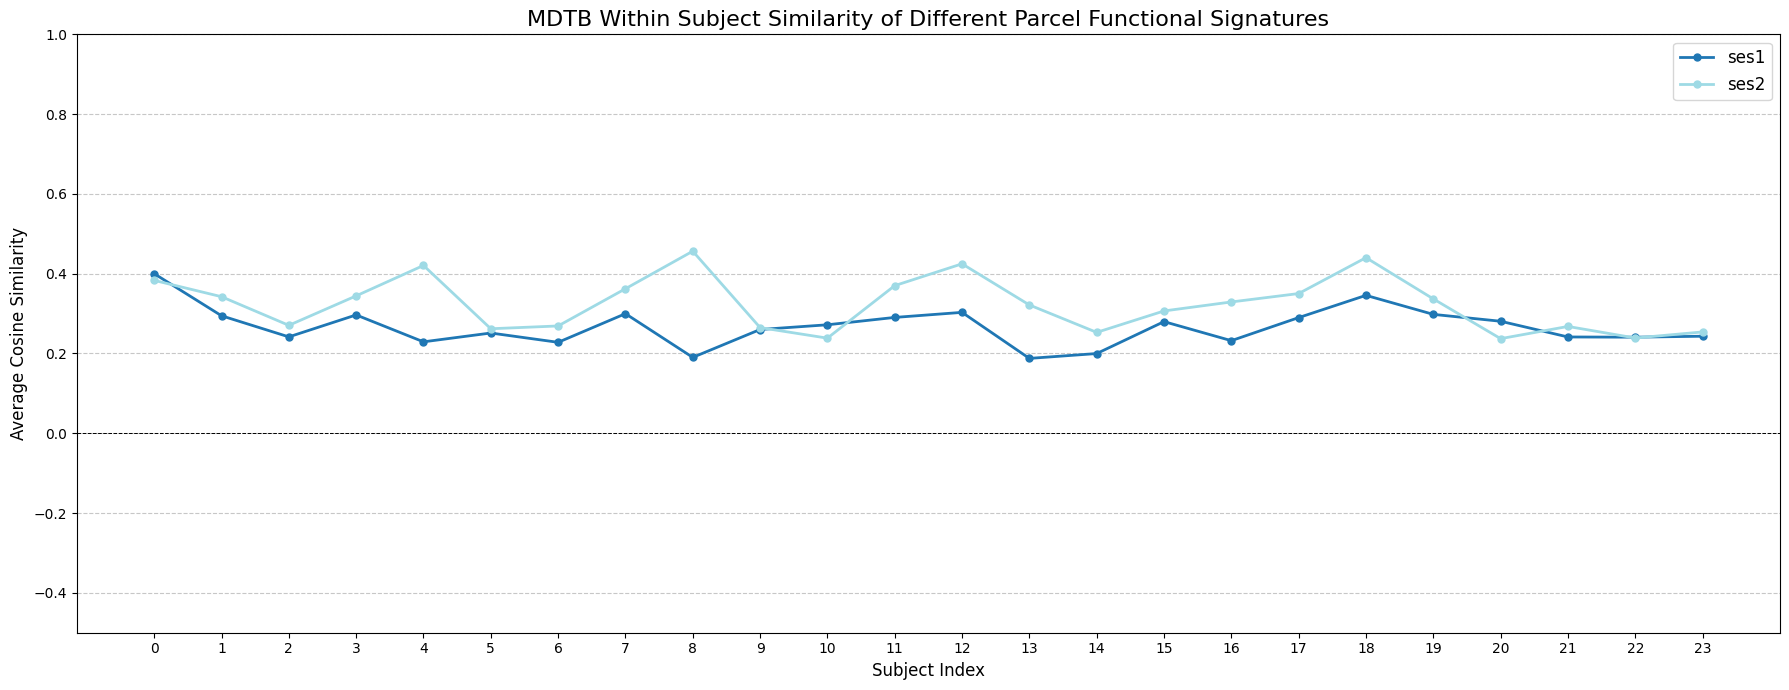

In [67]:
import torch as pt
import numpy as np
import matplotlib.pyplot as plt

wk_dir = '/Users/incehusain/fs_projects'

dataset = 'MDTB'

#sessions = ['ses-archi', 'ses-clips4',  'ses-enumeration','ses-hcp1', 'ses-hcp2','ses-lyon1', 
 #           'ses-lyon2','ses-mathlang', 'ses-mtt1', 'ses-mtt2',  'ses-preference', 'ses-rsvplanguage', 
  #          'ses-spatialnavigation', 'ses-tom']

sessions = ['ses1', 'ses2']

all_parcels = []

for ses in sessions:
    parcel = pt.load(f"{wk_dir}/cosine_similarities_{dataset}/{ses}_cosine_within_subj_groupV.pt")
    all_parcels.append(parcel)


num_subj = len(all_parcels[0])   
subj_indices = np.arange(num_subj)

fig, ax = plt.subplots(figsize=(18, 7))

colors = plt.cm.tab20(np.linspace(0, 1, len(sessions)))

for i, ses in enumerate(sessions):
    ax.plot(subj_indices, all_parcels[i], 'o-', label=f'{ses}', color=colors[i], linewidth=2, markersize=5)

ax.set_title(f'{dataset} Within Subject Similarity of Different Parcel Functional Signatures', fontsize=16)
ax.set_xlabel('Subject Index', fontsize=12)
ax.set_ylabel('Average Cosine Similarity', fontsize=12)

ax.set_xticks(subj_indices)

if num_subj > 30:
    ax.tick_params(axis='x', labelrotation=90)

ax.set_ylim(-0.5, 1)
ax.axhline(0, color='black', linestyle='--', linewidth=0.7)

ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_2547/871470528.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  matrix = pt.load(f"{wk_dir}/cosine_similaritie

KeyboardInterrupt: 

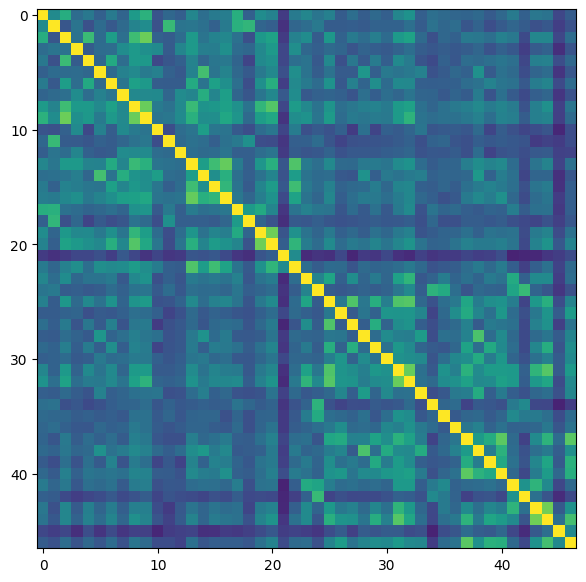

In [325]:
#parcel correlations visualization 

import torch as pt
import numpy as np
import matplotlib.pyplot as plt

wk_dir = '/Users/incehusain/fs_projects'

dataset = 'HCPur100'

sessions = ['task']

#sessions = ['ses-archi', 'ses-clips4',  'ses-enumeration','ses-hcp1', 'ses-hcp2','ses-lyon1', 
 #           'ses-lyon2','ses-mathlang', 'ses-mtt1', 'ses-mtt2',  'ses-preference', 'ses-rsvplanguage', 
  #          'ses-spatialnavigation', 'ses-tom']

matrices = []  

for ses in sessions:
    matrix = pt.load(f"{wk_dir}/cosine_similarities_{dataset}/{ses}_cosine_avg_all_parcels.pt")
    matrices.append(matrix)

matrices = np.stack(matrices, axis=0)

avg_matrix = np.mean(matrices, axis=0)

num_parcels = avg_matrix.shape[0]
parcel_indices = np.arange(num_parcels)

mask = np.any(avg_matrix != 0, axis=1)

filtered_matrix = avg_matrix[mask][:, mask]
filtered_indices = parcel_indices[mask]

fig, ax = plt.subplots(figsize=(18, 7))

im = ax.imshow(filtered_matrix, cmap='viridis', vmin=-0.2, vmax=1)

ax.set_title(f'{dataset} parcel correlations')
ax.set_xlabel('Thalamic Parcels')
ax.set_ylabel('Thalamic Parcels')

ax.set_xticks(np.arange(len(filtered_indices)))
ax.set_yticks(np.arange(len(filtered_indices)))
ax.set_xticklabels(filtered_indices)
ax.set_yticklabels(filtered_indices)

if len(filtered_indices) > 30:
    ax.tick_params(axis='x', labelrotation=90)

fig.colorbar(im, ax=ax,label='Similarity')

plt.tight_layout()  
plt.show()  


/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_2547/3694592334.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  group_parcel_reliability = pt.load(f"{wk_dir}

Language: r = 0.493, p = 3.149e-04
Social: r = 0.600, p = 5.084e-06
MDTB: r = 0.504, p = 2.254e-04
Nishimoto: r = 0.371, p = 8.746e-03


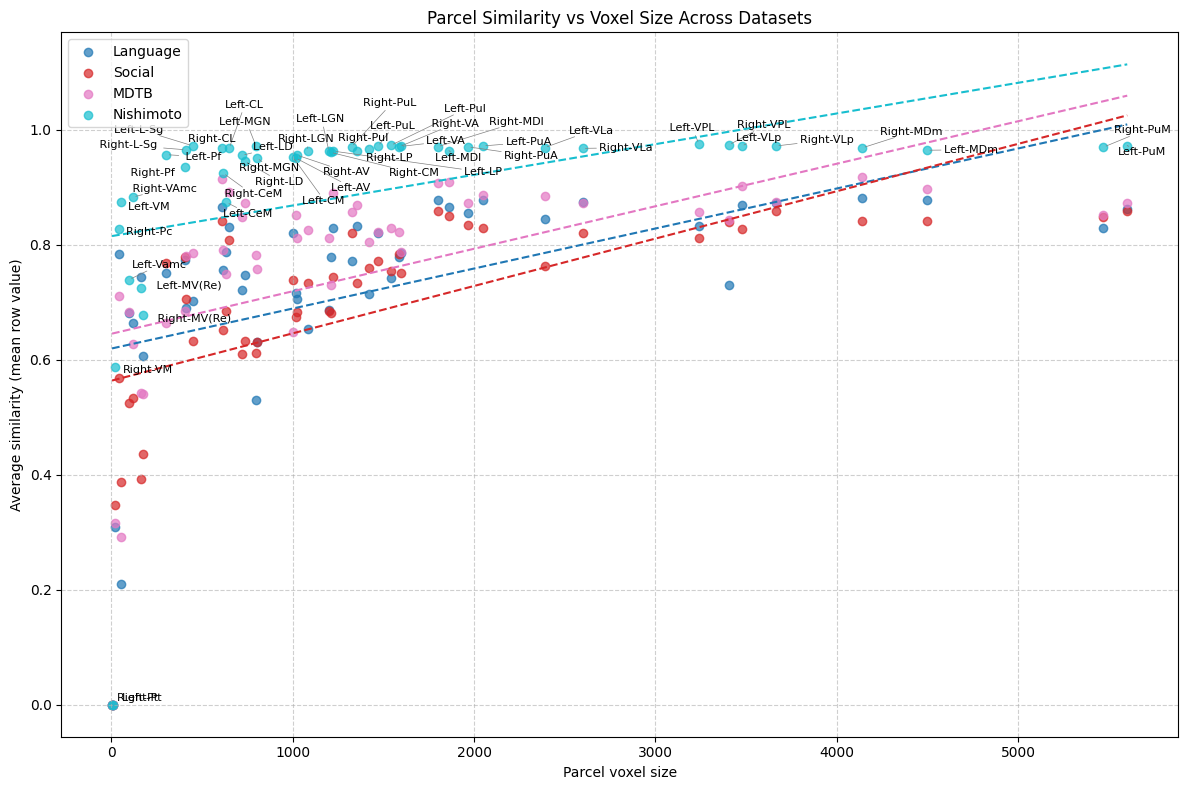

In [324]:
import torch as pt
import numpy as np
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from adjustText import adjust_text

wk_dir = '/Users/incehusain/fs_projects'

datasets = ['Language', 'Social', 'MDTB', 'Nishimoto']  

nii = nib.load(f"{wk_dir}/group_mean_thalamus_prob_map.nii.gz")
nii_data = nii.get_fdata()

parcel_df = pd.read_csv(f"{wk_dir}/thalamus_indices.csv")
parcel_names = parcel_df['Thalamus nucleus'].values

fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.tab10(np.linspace(0, 1, len(datasets)))

for d_i, dataset in enumerate(datasets):
    group_parcel_reliability = pt.load(f"{wk_dir}/V_matrices_{dataset}/group_parcel_reliability.pt")

    cosine_avg = np.nan_to_num(group_parcel_reliability, nan=0)

    #cosine_avg = pt.load(f"{wk_dir}/cosine_similarities_{dataset}/ses1_cosine_avg_all_parcels.pt")
    
    #n_parcels = cosine_avg.shape[0]
    #y_values = cosine_avg.mean(axis=1)

    y_values = cosine_avg
    n_parcels = len(y_values)
        
    x_values = []
    
    for idx in range(n_parcels):
        parcel_volume = nii_data[:, :, :, idx]
        voxel_count = np.sum(parcel_volume > 0)
        x_values.append(voxel_count)

    x_values = np.array(x_values)
            
    mask = x_values > 0
            
    x_filtered = x_values[mask]
    y_filtered = y_values[mask]
    names_filtered = parcel_names[mask]
            
    ax.scatter(x_filtered, y_filtered, color=colors[d_i],label=dataset,alpha=0.7)
            
    r, p = pearsonr(x_filtered, y_filtered)
    coef = np.polyfit(x_filtered, y_filtered, 1)
    poly1d_fn = np.poly1d(coef)
            
    sorted_idx = np.argsort(x_filtered)
    ax.plot(x_filtered[sorted_idx], poly1d_fn(x_filtered[sorted_idx]),color=colors[d_i],linestyle='--')
            
    print(f"{dataset}: r = {r:.3f}, p = {p:.3e}")

for i, name in enumerate(names_filtered):
    #ax.annotate(name, (x_filtered[i], y_filtered[i]), fontsize=8, alpha=0.6)
    ax.text(x_filtered[i], y_filtered[i], name, fontsize=8)

adjust_text(ax.texts, arrowprops=dict(arrowstyle='-', color='gray'), lw=0.5)

ax.set_xlabel('Parcel voxel size')
ax.set_ylabel('Average similarity (mean row value)')
ax.set_title('Parcel Similarity vs Voxel Size Across Datasets')

ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()

(11, 24, 47)
[[ 0.11651657  0.15445801  0.72902542]
 [ 0.18105344  0.17726809  0.64167847]
 [ 0.19987432  0.16940482  0.63072087]
 [ 0.21683933  0.11821974  0.66494093]
 [ 0.18381314  0.37105798  0.44512888]
 [-0.05150146  0.50913004  0.54237141]
 [ 0.21655897  0.26563863  0.5178024 ]
 [ 0.17830034  0.17085623  0.65084343]
 [ 0.14178081  0.18881776  0.66940143]
 [-0.02659497  0.48088726  0.54570771]
 [ 0.18632963  0.26793993  0.54573044]]


/var/folders/91/7fqn4cp541g41hf5rkxmsnhh0000gn/T/ipykernel_2547/2294744198.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  V = pt.load(f"{wk_dir}/V_matrices_{dataset}/{

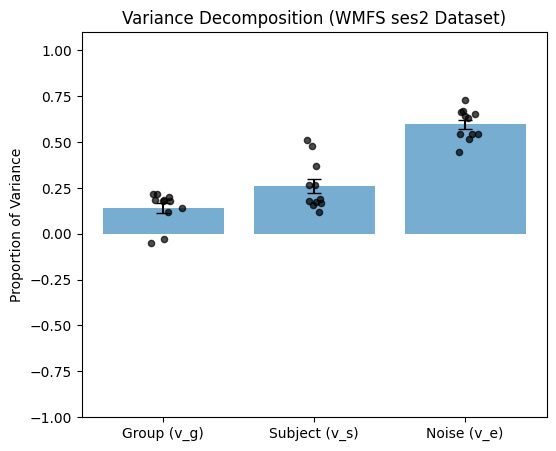

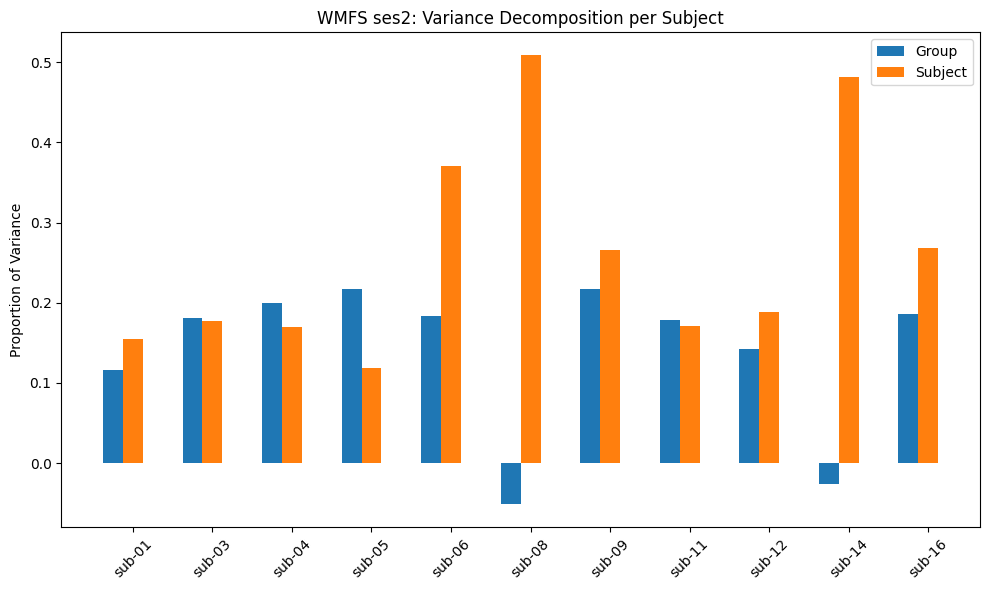

In [313]:
#variance decomposition 

import Functional_Fusion.dataset as ds
from Functional_Fusion.reliability import decompose_subj_group

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion_new' 

dataset = 'WMFS'

subjects = ['sub-01','sub-03', 'sub-04', 'sub-05','sub-06', 'sub-08','sub-09','sub-11','sub-12','sub-14','sub-16']

ses = 'ses2'

V_matrices = []

for subj in subjects:
    V = pt.load(f"{wk_dir}/V_matrices_{dataset}/{ses}_V_CondHalf_{subj}_norm.pt")
    V_matrices.append(V)

V_matrices = np.stack(V_matrices, axis=0)

mask = np.any(V_matrices > 0, axis=(0, 1))
filtered_V = V_matrices[:, :, mask]

C = int(len(filtered_V[0])/2)

cond_vec = np.tile(np.arange(1,C+1),2) #((1, C+1), P)

part_vec = np.repeat(np.arange(1,3), C) #((1, P+1), C)

var_decomp = decompose_subj_group(filtered_V, cond_vec, part_vec, separate = 'subject_wise', subtract_mean=False)

print(filtered_V.shape)

var_norm = np.zeros((len(subjects),3))

for i in range(len(subjects)): #number of rows 
    row_sum = np.sum(var_decomp[i])
    var_norm[i] = var_decomp[i]/row_sum

print(var_norm)

import numpy as np
import matplotlib.pyplot as plt

mean_var = var_norm.mean(axis=0)
sem_var = var_norm.std(axis=0) / np.sqrt(len(subjects))

labels = ['Group (v_g)', 'Subject (v_s)', 'Noise (v_e)']
x = np.arange(3)

plt.figure(figsize=(6,5))

# Bars (group mean)
plt.bar(x, mean_var, yerr=sem_var, capsize=5, alpha=0.6)

# Overlay individual subjects
for i in range(3):
    jitter = np.random.normal(0, 0.04, size=len(subjects))
    plt.scatter(np.full(len(subjects), x[i]) + jitter,
                var_norm[:, i],
                color='black',
                alpha=0.7,
                s = 20)

plt.xticks(x, labels)
plt.ylabel('Proportion of Variance')
plt.title(f'Variance Decomposition ({dataset} {ses} Dataset)')
plt.ylim(-1,1.1)
plt.show()



#per subject 

plt.figure(figsize=(10,6))

x = np.arange(len(subjects))
width = 0.25

plt.bar(x - width, var_norm[:,0], width, label='Group')
plt.bar(x,          var_norm[:,1], width, label='Subject')
#plt.bar(x + width,  var_norm[:,2], width, label='Noise')

plt.xticks(x, subjects, rotation=45)
plt.ylabel('Proportion of Variance')
plt.title(f'{dataset} {ses}: Variance Decomposition per Subject')
plt.legend()
plt.tight_layout()
plt.show()


In [328]:
#extracting datasets

import Functional_Fusion.dataset as ds

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion_new'


dataset = ds.DataSetMDTB(base_dir + '/Language')
dataset.extract_all(ses_id='ses-localizerfm',
                    type='CondRun', subj=[12,13],
                    atlas='MNISymThalamus1')

# subj=[9, 10, 11, 14, 15, 16]

Atlasmap sub-15
Extract sub-15
Atlasmap sub-16
Extract sub-16


In [9]:
import nibabel as nb
import nitools as nt 

#check if my _xfm files are correct by reslicing T1 into template using the xfm file (if successful, the resliced T1 should overlap decently with template)

wk_dir = '/Users/incehusain/fs_projects'

T1_path = f'{wk_dir}/xfm_files/Nishimoto/sub-01_T1w.nii'
deformation_path = f'{wk_dir}/xfm_files/Nishimoto/sub-01_space-MNI152NLin2009cSym_xfm.nii'

template_path = f'{wk_dir}/tpl-MNI152NLin2009cSym_res-1_T1w.nii'

resliced_T1_path = f'{wk_dir}/xfm_files/Nishimoto/resliced_check/sub-01_T1w_resliced.nii'

source_img = nb.load(T1_path)   
deformation_img = nb.load(deformation_path)

resliced_img = nt.deform_image(source_img, deformation_img, interpolation=0)

resliced_img.to_filename(resliced_T1_path)

In [344]:
with open(f"{wk_dir}/thalamus_atlas.lut") as f:
    for i in range(5):
        print(f.readline())

0 0 0 0 0

1 74 255 0 Left-AV 

2 0 255 124 Left-CeM 

3 34 255 0 Left-CL

4 0 255 84 Left-CM 

